In [29]:
import AmorphSim
from AmorphSim.clusters.clusters import Icosahedron
import matplotlib.pyplot as plt
import diffsims as ds
from diffsims.utils.fourier_transform import get_recip_points
from diffsims.utils.probe_utils import BesselProbe
import time
import numpy as np

In [69]:
ico = Icosahedron(num_shells=2)

[[1, 2, 9], [1, 2, 10], [1, 5, 6], [1, 5, 9], [1, 5, 6], [1, 6, 10], [1, 2, 9], [1, 5, 9], [1, 2, 10], [1, 6, 10], [1, 2, 9], [1, 2, 10], [2, 7, 8], [2, 7, 9], [2, 7, 8], [2, 8, 10], [1, 2, 9], [2, 7, 9], [1, 2, 10], [2, 8, 10], [3, 4, 11], [3, 4, 12], [3, 5, 6], [3, 5, 11], [3, 5, 6], [3, 6, 12], [3, 4, 11], [3, 5, 11], [3, 4, 12], [3, 6, 12], [3, 4, 11], [3, 4, 12], [4, 7, 8], [4, 7, 11], [4, 7, 8], [4, 8, 12], [3, 4, 11], [4, 7, 11], [3, 4, 12], [4, 8, 12], [1, 5, 6], [1, 5, 9], [3, 5, 6], [3, 5, 11], [1, 5, 6], [3, 5, 6], [1, 5, 9], [5, 9, 11], [3, 5, 11], [5, 9, 11], [1, 5, 6], [1, 6, 10], [3, 5, 6], [3, 6, 12], [1, 5, 6], [3, 5, 6], [1, 6, 10], [6, 10, 12], [3, 6, 12], [6, 10, 12], [2, 7, 8], [2, 7, 9], [4, 7, 8], [4, 7, 11], [2, 7, 8], [4, 7, 8], [2, 7, 9], [7, 9, 11], [4, 7, 11], [7, 9, 11], [2, 7, 8], [2, 8, 10], [4, 7, 8], [4, 8, 12], [2, 7, 8], [4, 7, 8], [2, 8, 10], [8, 10, 12], [4, 8, 12], [8, 10, 12], [1, 2, 9], [1, 5, 9], [1, 2, 9], [2, 7, 9], [1, 5, 9], [5, 9, 11], [2, 

In [70]:
ico.get_5_fold_axis()

In [71]:
ico.add_disorder(.2)

In [72]:
real_grid, recip_grid =get_recip_points(2, dX=.2, rX=40)
probe = BesselProbe(50)
c = ico.xyz_cartn.reshape(-1,3).max(0)/2 # Centre of crystal

In [73]:
tic = time.time()
ediff = ds.AtomicDiffractionGenerator(500, real_grid,)
diff_plain = ediff.calculate_ed_data(ico, probe, slice_thickness=1, probe_centre=c[:2])
'Standard diffraction pattern: %.2fs'%(time.time()-tic)

'Standard diffraction pattern: 3.72s'

In [74]:
diff_plain[diff_plain>0.2]=0

<IPython.core.display.Javascript object>


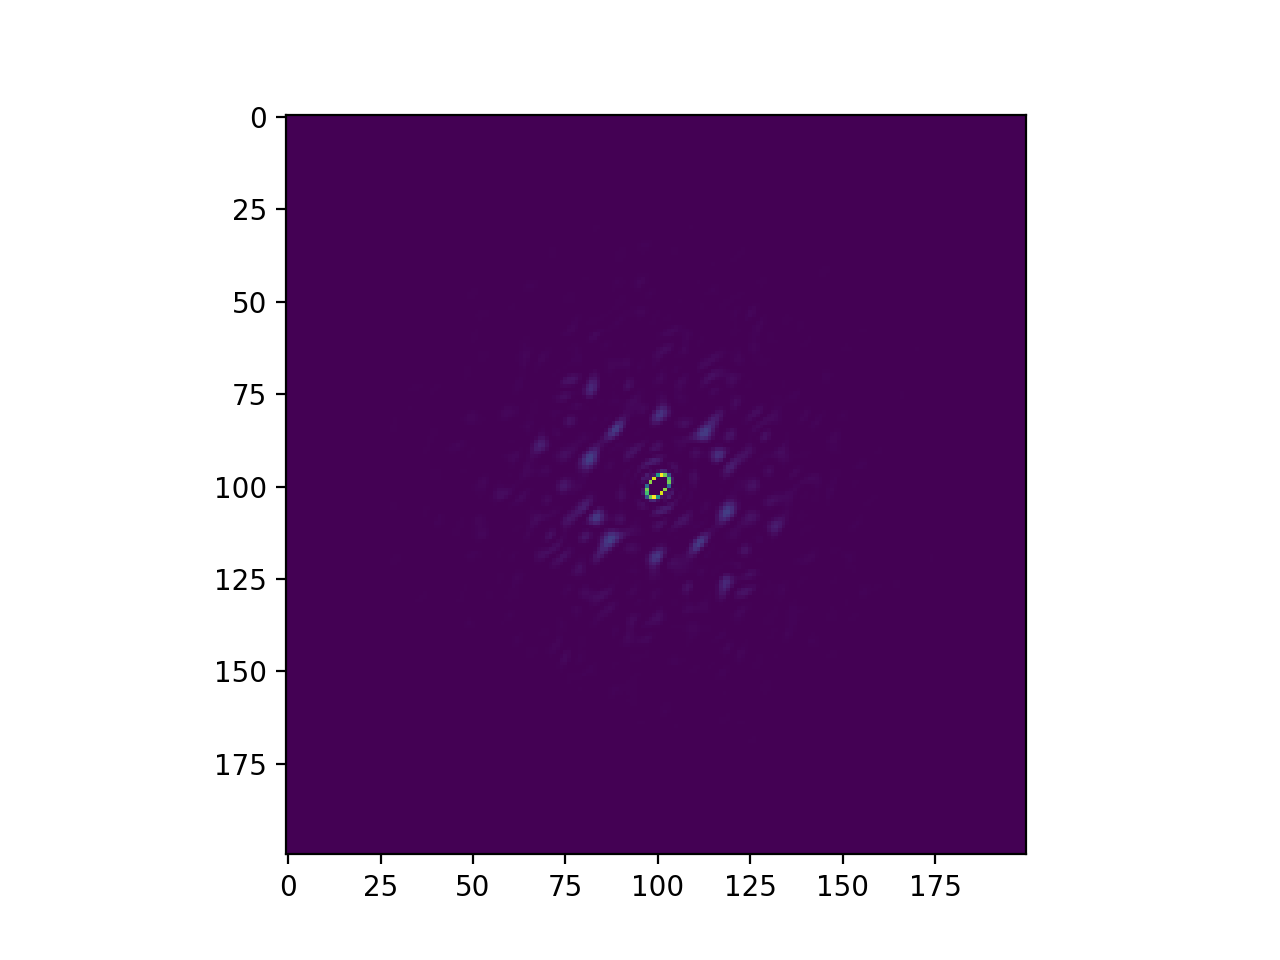

In [75]:
%matplotlib notebook
plt.imshow(diff_plain)
plt.show()

NameError: name 'generator' is not defined

In [18]:
spot_indices, cartesian_coordinates, spot_distances = get_points_in_sphere(ico.lattice.reciprocal(), 100)

In [25]:
generator.calculate_profile_data(ico)

ValueError: max() arg is an empty sequence

<IPython.core.display.Javascript object>


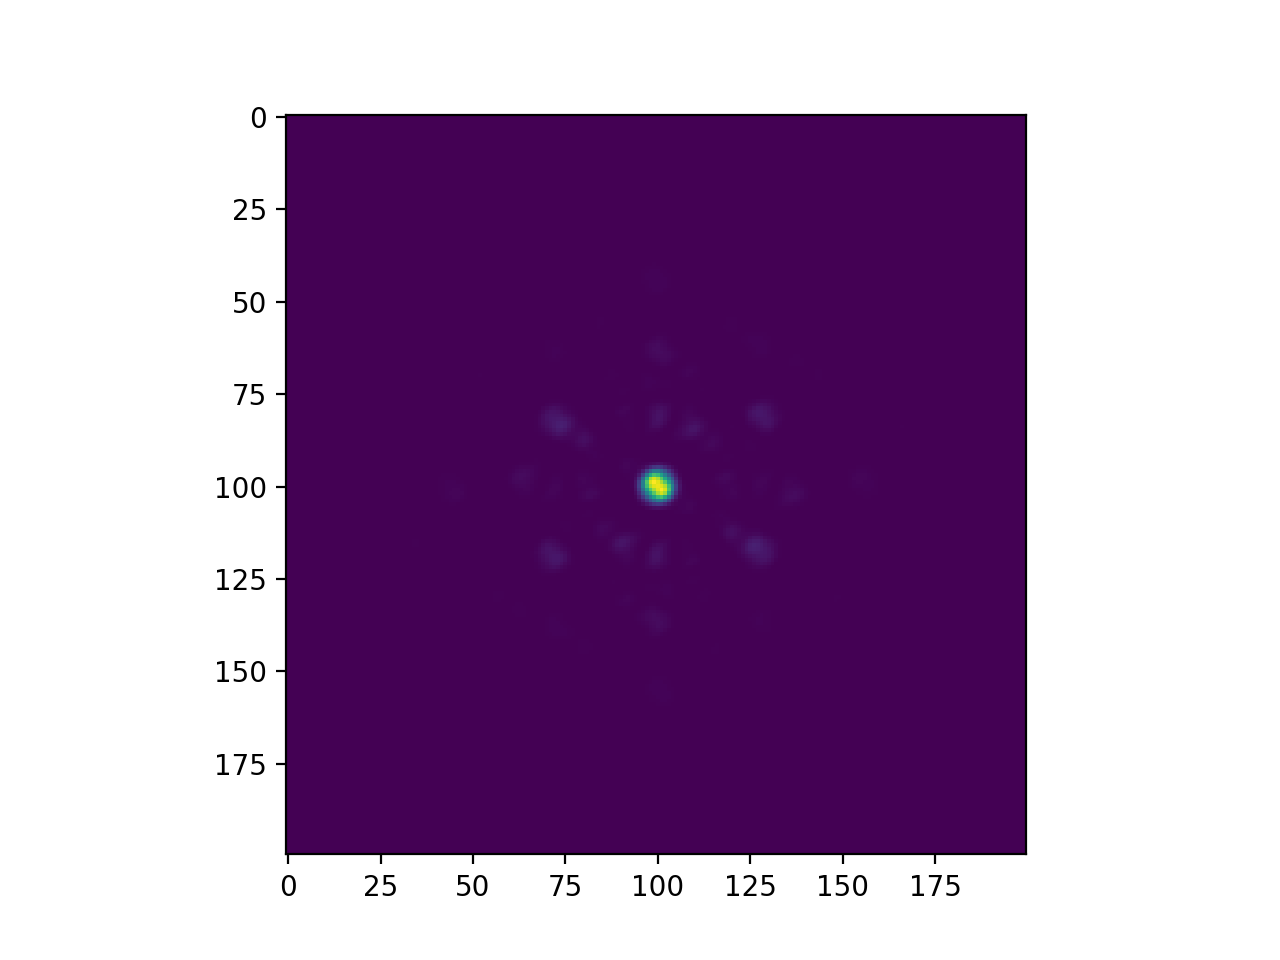

In [13]:
%matplotlib notebook
plt.imshow(sim.get_diffraction_pattern())

In [13]:
cube.add_random_clusters(num_clusters=1000) # adding 1000 randomly oriented clusters
print(cube)

NameError: name 'cube' is not defined

In [ ]:
cube.plot_symmetries()

In [11]:
no_noise = cube.get_4d_stem(convolve=True)
small_noise = cube.get_4d_stem(noise=100, convolve=True)
med_noise = cube.get_4d_stem(noise=200, convolve=True)
large_noise = cube.get_4d_stem(noise=500, convolve=True)

In [12]:
import hyperspy.api as hs
import matplotlib.pyplot as plt

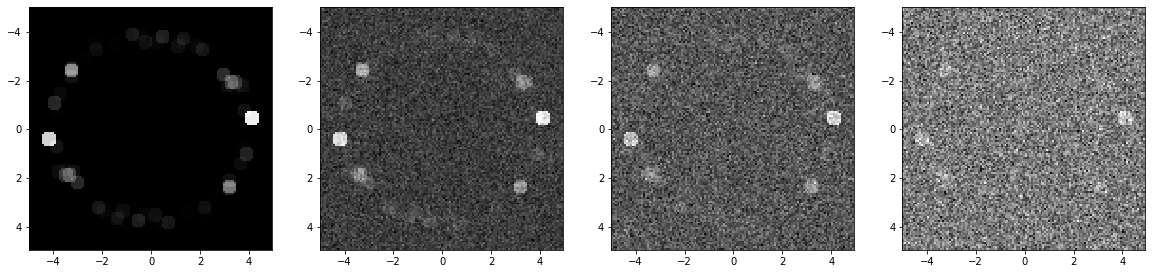

In [13]:
f = plt.figure(figsize=(20,10))
hs.plot.plot_images([no_noise.inav[10,10],
                      small_noise.inav[10,10],
                      med_noise.inav[10,10],
                      large_noise.inav[10,10]],per_row=4, fig=f, colorbar=None)
plt.show()

In [14]:
no_noise.set_signal_type("DiffractionSignal")
small_noise.set_signal_type("DiffractionSignal")
med_noise.set_signal_type("DiffractionSignal")
large_noise.set_signal_type("DiffractionSignal")

In [15]:
no_noise.metadata.Signal.Ellipticity.center= [64,64]
no_noise.metadata.Signal.Ellipticity.angle = None
no_noise.metadata.Signal.Ellipticity.lengths = None
no_noise.metadata.Signal.Ellipticity.calibrated = True
no_noise_polar = no_noise.calculate_polar_spectrum(phase_width=180)

In [16]:
corr = no_noise_polar.autocorrelation()

In [17]:
p = corr.get_power_spectrum().isig[0:12,:]

<IPython.core.display.Javascript object>


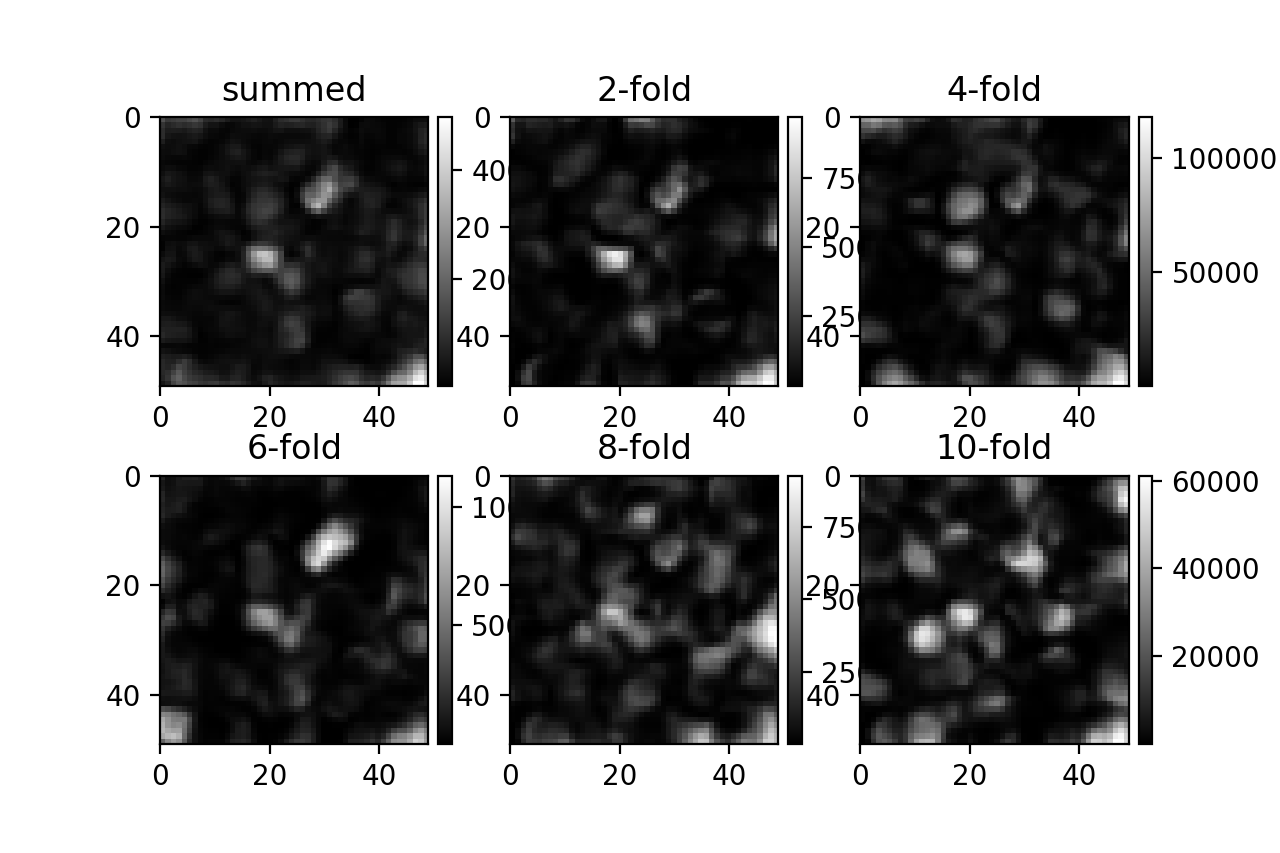

In [30]:
%matplotlib notebook
p.plot_symmetries()

In [19]:
small_noise.metadata.Signal.Ellipticity.center= [64,64]
small_noise.metadata.Signal.Ellipticity.angle = None
small_noise.metadata.Signal.Ellipticity.lengths = None
small_noise.metadata.Signal.Ellipticity.calibrated = True
small_noise_polar = no_noise.calculate_polar_spectrum(phase_width=180)

In [31]:
corr = small_noise_polar.autocorrelation()

In [32]:
p = corr.get_power_spectrum().isig[0:12,:]

<IPython.core.display.Javascript object>


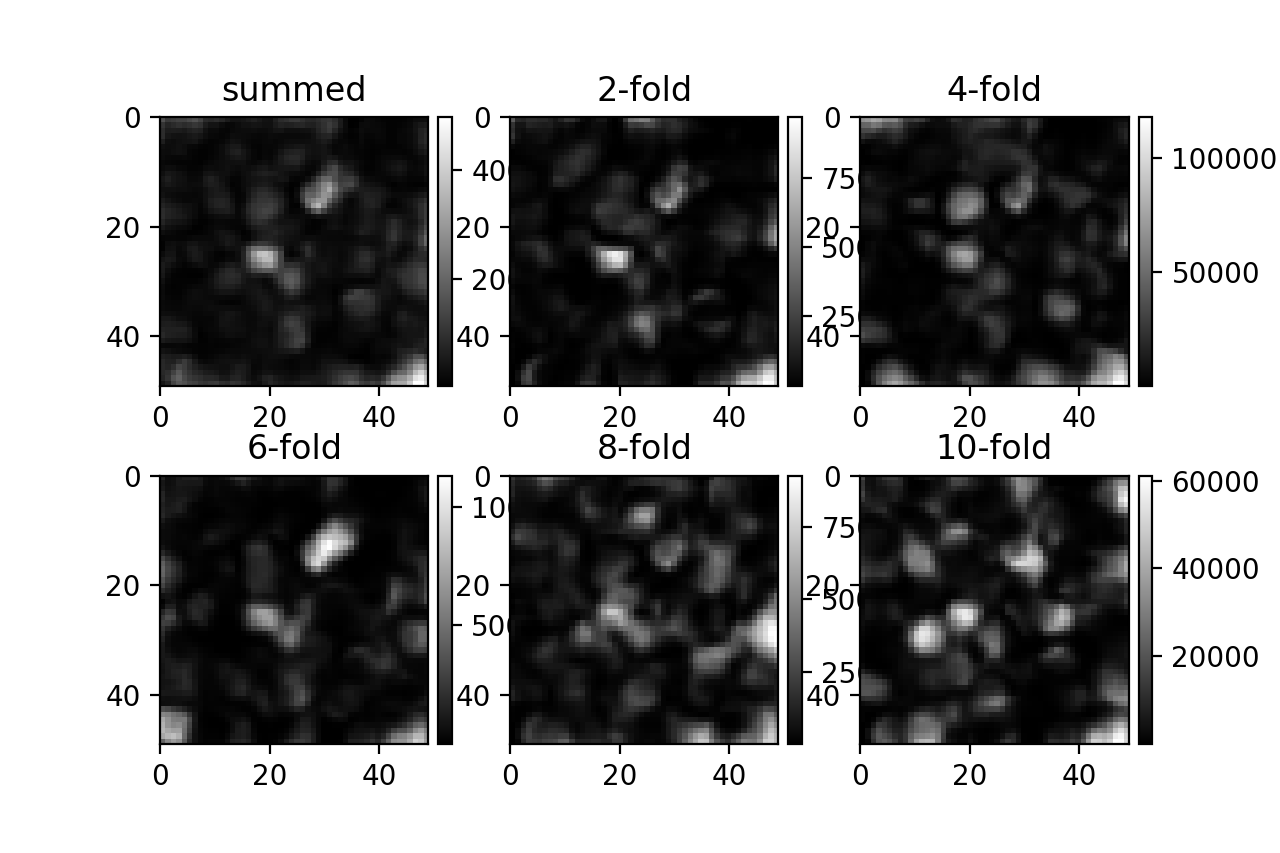

In [33]:
p.plot_symmetries()